In [1]:
import keras
from keras import backend as K
from keras import layers, regularizers, callbacks
from keras.models import load_model

import tensorflow as tf
import random

import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, hamming_loss

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
version = 'v1'

# label load

In [3]:
train_X = pd.read_excel('./data/paper_train.xlsx')
train_X = train_X.drop(['Unnamed: 0', 'abstract'], axis=1)
train_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
val_X = pd.read_excel('./data/paper_val.xlsx')
val_X = val_X.drop(['Unnamed: 0', 'abstract'], axis=1)
val_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_X = pd.read_excel('./data/paper_test.xlsx')
test_X = test_X.drop(['Unnamed: 0', 'abstract'], axis=1)
test_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
one_hot_train_labels = np.array(train_X)
one_hot_train_labels
print(one_hot_train_labels.shape)

one_hot_val_labels = np.array(val_X)
one_hot_val_labels
print(one_hot_val_labels.shape)

one_hot_test_labels = np.array(test_X)
one_hot_test_labels
print(one_hot_test_labels.shape)

(2805, 262)
(935, 262)
(935, 262)


# Residual autoencoder

In [7]:
encoding_dim = 64

### input ###
input_label = keras.Input(shape=(one_hot_train_labels.shape[1],))

### encoder 1 residual ###
encoded_1 = layers.Dense(256, activation='relu')(input_label)
encoded_2 = layers.Dense(200, activation='relu')(encoded_1)

residual_1 = layers.Dense(200)(input_label)
encoded_3 = layers.add([encoded_2, residual_1])
dropout_1 = layers.Dropout(0.2)(encoded_3)

### encoder 2 ###
encoded_4 = layers.Dense(128, activation='relu')(dropout_1)


### latent space ###
latent_space = layers.Dense(encoding_dim, activation='relu')(encoded_4)


### decoder 1 ###
decoded_1 = layers.Dense(128, activation='relu')(latent_space)

### decoder 2 residual ###
decoded_2 = layers.Dense(200, activation='relu')(decoded_1)
decoded_3 = layers.Dense(256, activation='relu')(decoded_2)

residual_2 = layers.Dense(256)(decoded_1)
decoded_4 = layers.add([decoded_3, residual_2])

### output ###
decoded_5 = layers.Dense(one_hot_train_labels.shape[1], activation='sigmoid')(decoded_4)



autoencoder = keras.Model(input_label, decoded_5)

autoencoder.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 262)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          67328       input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 200)          51400       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 200)          52600       input_1[0][0]                    
____________________________________________________________________________________________

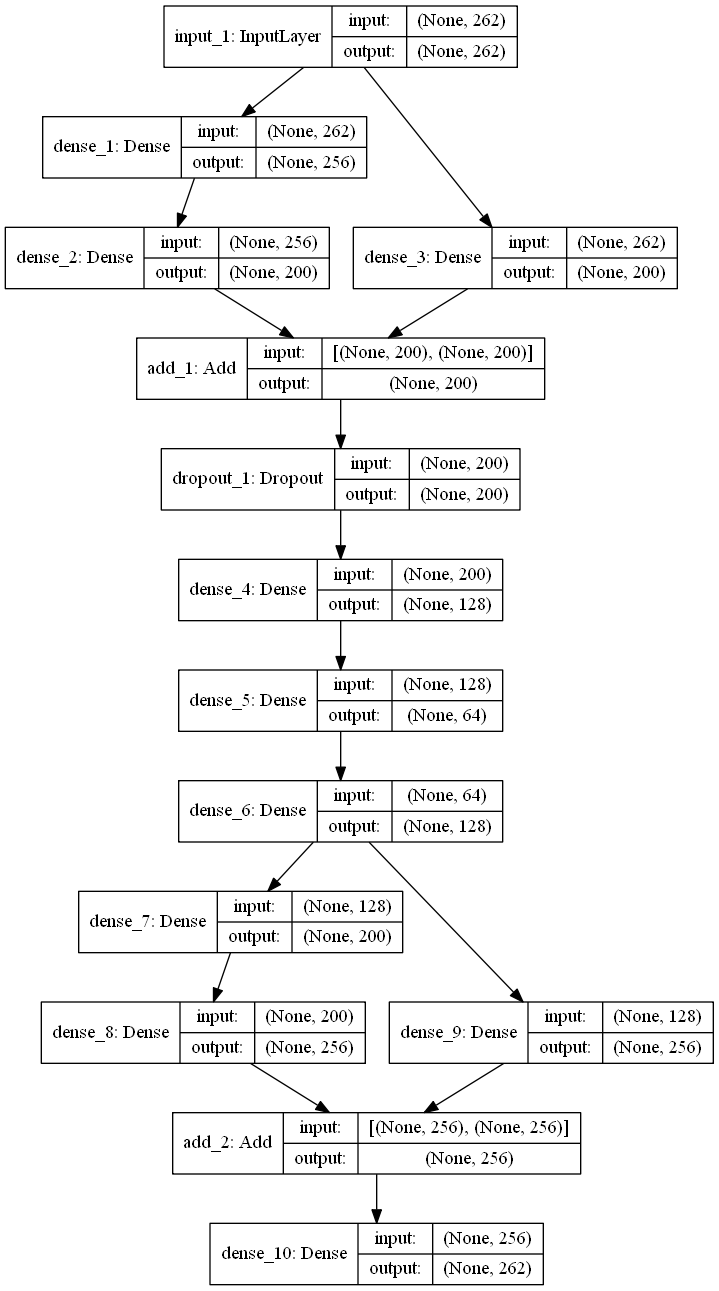

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(autoencoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(autoencoder, show_shapes=True, to_file='./img/Residual_AE_ls64_{}.png'.format(version))

In [9]:
encoder = keras.Model(input_label, latent_space)

encoder.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 262)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          67328       input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 200)          51400       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 200)          52600       input_1[0][0]                    
____________________________________________________________________________________________

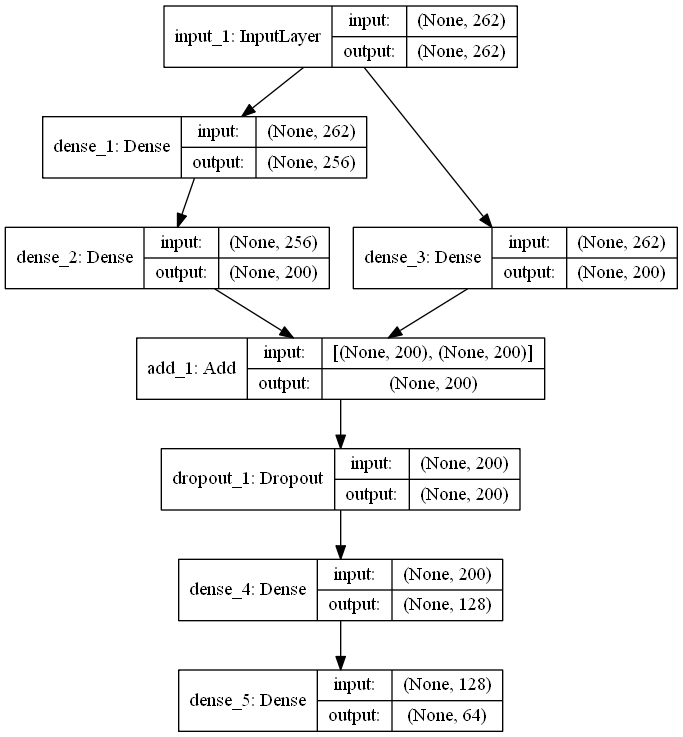

In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(encoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(encoder, show_shapes=True, to_file='./img/Residual_Encoder_ls64_{}.png'.format(version))

In [11]:
### input ###
decoded_input = keras.Input(shape=(encoding_dim,))

### decoder 1 ###
decoder_layer1 = autoencoder.layers[-6](decoded_input)

### decoder 1 residual ###
decoder_layer2 = autoencoder.layers[-5](decoder_layer1)
decoder_layer3 = autoencoder.layers[-4](decoder_layer2)
decoder_residual1 = autoencoder.layers[-3](decoder_layer1)
decoder_layer4 = autoencoder.layers[-2]([decoder_layer3, decoder_residual1])

### output ###
decoder_layer5 = autoencoder.layers[-1](decoder_layer4)


decoder = keras.Model(decoded_input, decoder_layer5)

decoder.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 64)           0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 128)          8320        input_2[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 200)          25800       dense_6[1][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 256)          51456       dense_7[1][0]                    
____________________________________________________________________________________________

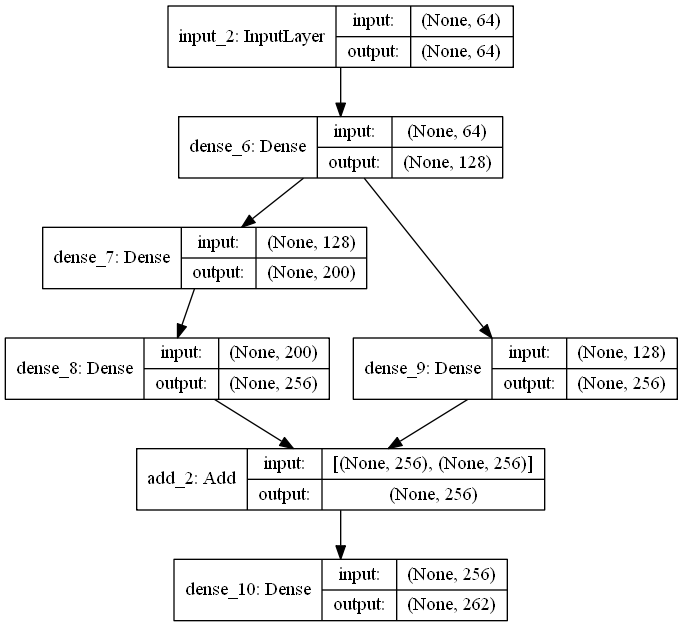

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(decoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(decoder, show_shapes=True, to_file='./img/Residual_Decoder_ls64_{}.png'.format(version))

In [13]:
optimizer = keras.optimizers.Adam(lr=0.001)

autoencoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)
encoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)
decoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)

### 버전 체크

In [14]:
es = callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='auto')

filename = './trained_model/RAE_ls64_{}'.format(version) + '-{epoch:02d}-{val_loss:.5f}.h5'
mc = callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, mode='auto')

In [15]:
history = autoencoder.fit(one_hot_train_labels,
                          one_hot_train_labels,
                          epochs=300,
                          batch_size=64,
                          validation_data=(one_hot_val_labels, one_hot_val_labels),
                          callbacks=[es, mc])

Train on 2805 samples, validate on 935 samples
Epoch 1/300
2805/2805 [==============================] - 2s 597us/step - loss: 0.1885 - val_loss: 0.0427

Epoch 00001: saving model to ./trained_model/RAE_ls64_v1-01-0.04269.h5
Epoch 2/300
2805/2805 [==============================] - 0s 81us/step - loss: 0.0370 - val_loss: 0.0355

Epoch 00002: saving model to ./trained_model/RAE_ls64_v1-02-0.03546.h5
Epoch 3/300
2805/2805 [==============================] - 0s 79us/step - loss: 0.0338 - val_loss: 0.0329

Epoch 00003: saving model to ./trained_model/RAE_ls64_v1-03-0.03294.h5
Epoch 4/300
2805/2805 [==============================] - 0s 77us/step - loss: 0.0309 - val_loss: 0.0305

Epoch 00004: saving model to ./trained_model/RAE_ls64_v1-04-0.03047.h5
Epoch 5/300
2805/2805 [==============================] - 0s 78us/step - loss: 0.0286 - val_loss: 0.0278

Epoch 00005: saving model to ./trained_model/RAE_ls64_v1-05-0.02782.h5
Epoch 6/300
2805/2805 [==============================] - 0s 77us/step - 

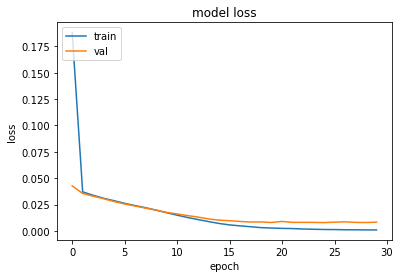

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
encoder.save('./trained_model/residual_encoder_ls64_{}.h5'.format(version))
decoder.save('./trained_model/residual_decoder_ls64_{}.h5'.format(version))

# inference

In [18]:
#one_hot_train_labels[0].shape[0]

In [19]:
encoded_values = encoder.predict(one_hot_test_labels)
encoded_values

array([[2.8973937 , 0.        , 2.430467  , ..., 0.        , 3.305915  ,
        0.8668379 ],
       [2.1970513 , 0.        , 1.650359  , ..., 0.        , 1.8672732 ,
        1.0587937 ],
       [2.068614  , 0.        , 2.188759  , ..., 0.        , 1.4199378 ,
        1.3305787 ],
       ...,
       [3.4945784 , 0.        , 2.8110926 , ..., 0.        , 3.8479044 ,
        0.8891897 ],
       [0.790727  , 0.        , 2.3436792 , ..., 0.        , 4.0606413 ,
        1.5351504 ],
       [3.2204156 , 0.        , 0.06762197, ..., 0.        , 2.3732517 ,
        2.4022858 ]], dtype=float32)

In [20]:
b = pd.DataFrame(encoded_values)
b.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,...,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,2.000264,0.000282,1.770473,3.001664,0.748399,1.841821,0.716431,1.671901,2.024614,2.497740,...,1.656224,1.725947,2.254396,0.678099,0.000040,2.743618,2.489321,0.012201,1.941548,1.388368
std,0.966782,0.005323,1.061730,1.617374,0.656932,0.979403,0.477461,0.918942,1.166196,1.145736,...,1.062044,0.963977,0.982977,0.557850,0.000903,1.241952,1.331393,0.073273,1.201281,0.913077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.430748,0.000000,1.089831,1.849482,0.118464,1.164428,0.386314,1.093763,1.215950,1.687131,...,1.008125,1.108852,1.531043,0.216370,0.000000,1.944655,1.532199,0.000000,0.983281,0.701504
50%,1.949617,0.000000,1.650359,3.026976,0.736422,1.857440,0.694640,1.581128,1.970191,2.568809,...,1.623947,1.734275,2.303953,0.596111,0.000000,2.675314,2.446083,0.000000,2.096469,1.366772
75%,2.524592,0.000000,2.459525,3.962219,1.106100,2.581194,1.004372,2.294873,2.863603,3.318144,...,2.347690,2.312799,2.974769,1.008312,0.000000,3.653288,3.167258,0.000000,2.631431,1.953024
max,5.928918,0.117345,5.846025,8.215473,3.752942,6.064424,2.442442,4.786942,6.375435,7.490198,...,5.390090,5.654939,5.761024,2.842076,0.023905,6.951159,8.047704,0.937343,5.674795,4.201205


In [21]:
#b.to_excel('./Residual_AE_v10.xlsx')

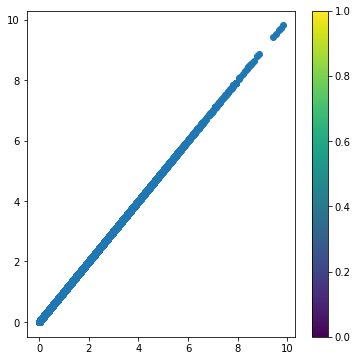

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(encoded_values[:, :], encoded_values[:, :])
plt.colorbar()
plt.show()

In [23]:
decoded_label = decoder.predict(encoded_values)
decoded_label

array([[1.9452043e-05, 1.7726591e-12, 9.9965334e-01, ..., 1.1875109e-08,
        1.5482103e-11, 1.3411084e-05],
       [6.7992406e-19, 1.9831930e-14, 3.2266629e-21, ..., 2.8151688e-16,
        1.4097746e-22, 2.6678367e-07],
       [4.6575345e-23, 1.2275148e-20, 2.3859147e-16, ..., 3.5192118e-09,
        1.5887030e-05, 1.7760817e-11],
       ...,
       [5.9238319e-16, 1.0387466e-20, 1.2042320e-06, ..., 2.0137880e-12,
        4.0472000e-07, 1.2442492e-08],
       [3.6644110e-08, 2.4767148e-11, 1.5742497e-12, ..., 5.9614513e-20,
        1.0564402e-15, 7.7005069e-08],
       [5.1535883e-17, 1.7168794e-15, 2.7425398e-15, ..., 4.3896881e-10,
        1.3235670e-08, 8.4291610e-14]], dtype=float32)

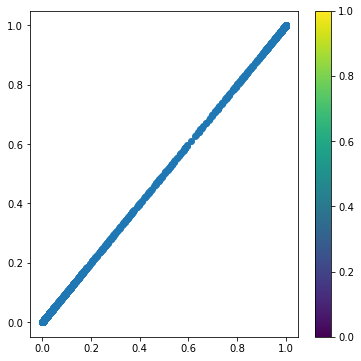

In [24]:
plt.figure(figsize=(6, 6))
plt.scatter(decoded_label[:, :], decoded_label[:, :])
plt.colorbar()
plt.show()

In [25]:
predicted_label = decoded_label.round()
predicted_label

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
"""predicted_label = np.where(decoded_label > 0.5, 1, 0)
predicted_label"""

'predicted_label = np.where(decoded_label > 0.5, 1, 0)\npredicted_label'

In [27]:
one_hot_test_labels

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [29]:
c_matrix.shape

(262, 2, 2)

In [30]:
c_matrix

array([[[933,   0],
        [  0,   2]],

       [[928,   0],
        [  3,   4]],

       [[874,   0],
        [  7,  54]],

       ...,

       [[932,   0],
        [  0,   3]],

       [[934,   0],
        [  0,   1]],

       [[933,   1],
        [  0,   1]]], dtype=int64)

In [31]:
print('accuracy : ', accuracy_score(one_hot_test_labels, predicted_label))
print('precision : ', precision_score(one_hot_test_labels, predicted_label, average='micro'))
print('recall : ', recall_score(one_hot_test_labels, predicted_label, average='micro'))
print('f1 : ', f1_score(one_hot_test_labels, predicted_label, average='micro'))
print('hamming_loss : ', hamming_loss(one_hot_test_labels, predicted_label))

accuracy :  0.8010695187165775
precision :  0.9290969899665552
recall :  0.8362432269717038
f1 :  0.8802281368821293
hamming_loss :  0.001543046087275993


In [32]:
print('accuracy : ', accuracy_score(one_hot_test_labels, predicted_label))
print('precision : ', precision_score(one_hot_test_labels, predicted_label, average='samples'))
print('recall : ', recall_score(one_hot_test_labels, predicted_label, average='samples'))
print('f1 : ', f1_score(one_hot_test_labels, predicted_label, average='samples'))
print('hamming_loss : ', hamming_loss(one_hot_test_labels, predicted_label))

accuracy :  0.8010695187165775
precision :  0.9275401069518716
recall :  0.8933868092691621
f1 :  0.9034262410198239
hamming_loss :  0.001543046087275993


C:\Users\user\.conda\envs\mlc\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
"""labels = ["".join("c" + str(i)) for i in range(1, 21)]
labels"""

'labels = ["".join("c" + str(i)) for i in range(1, 21)]\nlabels'

In [34]:
"""import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=12):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_xlabel('True label')
    axes.set_ylabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)"""

'import pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\ndef print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=12):\n\n    df_cm = pd.DataFrame(\n        confusion_matrix, index=class_names, columns=class_names,\n    )\n\n    try:\n        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)\n    except ValueError:\n        raise ValueError("Confusion matrix values must be integers.")\n    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha=\'right\', fontsize=fontsize)\n    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha=\'right\', fontsize=fontsize)\n    axes.set_xlabel(\'True label\')\n    axes.set_ylabel(\'Predicted label\')\n    axes.set_title("Confusion Matrix for the class - " + class_label)'

In [35]:
"""fig, ax = plt.subplots(5, 4, figsize=(12, 12))
    
for axes, cfs_matrix, label in zip(ax.flatten(), c_matrix, labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["Y", "N"])
    
fig.tight_layout()
plt.show()"""

'fig, ax = plt.subplots(5, 4, figsize=(12, 12))\n    \nfor axes, cfs_matrix, label in zip(ax.flatten(), c_matrix, labels):\n    print_confusion_matrix(cfs_matrix, axes, label, ["Y", "N"])\n    \nfig.tight_layout()\nplt.show()'